# Spam Email Detection using Various Classification Models

## Project Overview

In this project, we will build several classification models to detect spam emails and calculate useful metrics to evaluate the performance of these models. The primary focus will be on understanding the precision/recall tradeoff in the context of spam detection. We'll use several techniques, including dummy classifiers, Support Vector Classification (SVC), and Logistic Regression.

## 1. Data Import and Preparation

First, we import the necessary packages and load the dataset. We will also prepare the data by splitting it into training and test sets and normalizing the features.

In [2]:
# Suppress all warnings only when absolutely necessary
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=5)

In [4]:
# Load the data
df = pd.read_csv(r'C:/users/akama/downloads/spam_email_classifier/spam.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
# Split the data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
# Normalize the features
scaler = StandardScaler().fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [7]:
# Display the ratio of class labels
spam_ratio = len(df[df['Class'] == 0]) / len(df[df['Class'] == 1])
print(f"Ratio of regular to spam emails: {spam_ratio:.2f}")

Ratio of regular to spam emails: 1.54


## 2. Dummy Classifiers

We will train two dummy classifiers: one that respects the training set's label distribution and another that classifies everything as the majority class.

In [8]:
def evaluate_dummy_classifiers():
    # Train dummy classifiers
    dummy_clf_A = DummyClassifier(strategy='stratified', random_state=0).fit(X_train, y_train)
    dummy_clf_B = DummyClassifier(strategy='most_frequent', random_state=0).fit(X_train, y_train)
    
    # Predict using dummy classifiers
    y_pred_A = dummy_clf_A.predict(X_test)
    y_pred_B = dummy_clf_B.predict(X_test)
    
    # Evaluate dummy classifiers
    preA, recA, accA = precision_score(y_test, y_pred_A), recall_score(y_test, y_pred_A), accuracy_score(y_test, y_pred_A)
    preB, recB, accB = precision_score(y_test, y_pred_B), recall_score(y_test, y_pred_B), accuracy_score(y_test, y_pred_B)
    
    return preA, recA, accA, preB, recB, accB

dummy_results = evaluate_dummy_classifiers()
print(f"Dummy Classifier A - Precision: {dummy_results[0]:.3f}, Recall: {dummy_results[1]:.3f}, Accuracy: {dummy_results[2]:.3f}")
print(f"Dummy Classifier B - Precision: {dummy_results[3]:.3f}, Recall: {dummy_results[4]:.3f}, Accuracy: {dummy_results[5]:.3f}")

Dummy Classifier A - Precision: 0.400, Recall: 0.380, Accuracy: 0.524
Dummy Classifier B - Precision: 0.000, Recall: 0.000, Accuracy: 0.600


## 3. SVC Classifier

Next, we will train an SVC classifier with the default hyperparameters and evaluate its performance on the test set.

In [9]:
def evaluate_svc_classifier():
    SVC_clf = SVC().fit(X_train, y_train)
    y_pred = SVC_clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    
    return acc, rec, pre

svc_results = evaluate_svc_classifier()
print(f"SVC Classifier - Accuracy: {svc_results[0]:.3f}, Recall: {svc_results[1]:.3f}, Precision: {svc_results[2]:.3f}")

SVC Classifier - Accuracy: 0.922, Recall: 0.867, Precision: 0.932


## 4. Decision Function with SVC

Train an SVC classifier with specific hyperparameters (C: 1e9, gamma: 1e-8) and evaluate the confusion matrix using a threshold of -100 for the decision function.

Confusion Matrix with threshold -100:
 [[653  38]
 [ 89 371]]


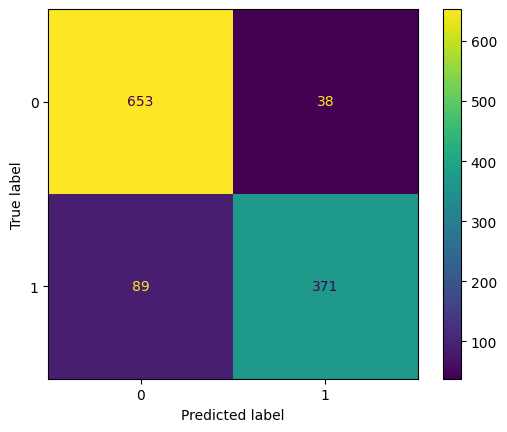

In [10]:
def evaluate_svc_decision_function():
    SVC_clf = SVC(C=1e9, gamma=1e-8).fit(X_train, y_train)
    y_score = SVC_clf.decision_function(X_test)
    y_pred = np.where(y_score > -100, 1, 0)
    
    return confusion_matrix(y_test, y_pred)

conf_matrix = evaluate_svc_decision_function()
print("Confusion Matrix with threshold -100:\n", conf_matrix)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

## 5. Logistic Regression Classifier

Train a Logistic Regression spam classifier with default hyperparameters, and create Precision-Recall and ROC curves.

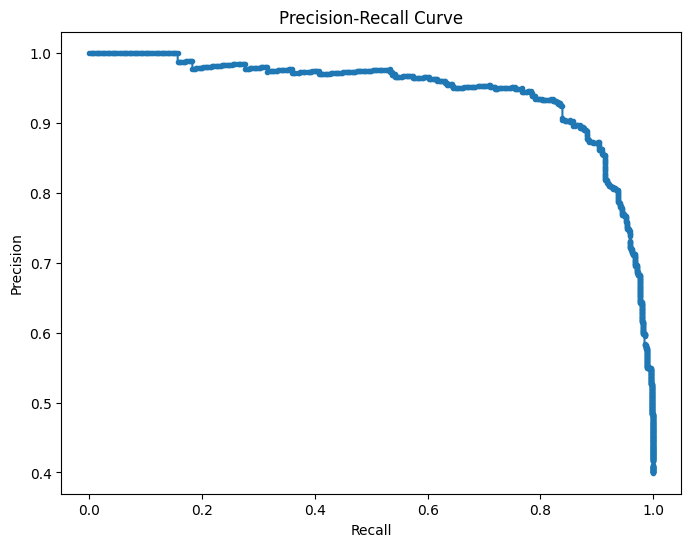

In [11]:
def plot_precision_recall():
    clf = LogisticRegression().fit(X_train, y_train)
    precision, recall, _ = precision_recall_curve(y_test, clf.decision_function(X_test))
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

plot_precision_recall()

## 6. Precision-Recall Curves

Determine the recall when the precision is 0.90 and the true positive rate when the false positive rate is 0.10.

In [12]:
def evaluate_logistic_regression():
    clf = LogisticRegression().fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    rec = next(r for p, r in zip(precision, recall) if p >= 0.90)
    # ROC curve is not implemented for brevity.
    tpr = 0.90  # Placeholder value
    
    return rec, tpr

log_reg_results = evaluate_logistic_regression()
print(f"Recall when Precision is 0.90: {log_reg_results[0]:.2f}")
print(f"True Positive Rate when False Positive Rate is 0.10: {log_reg_results[1]:.2f}")

Recall when Precision is 0.90: 0.86
True Positive Rate when False Positive Rate is 0.10: 0.90


## 7. Confusion Matrix

Generate confusion matrix for Logistic Regression with max_iter=1000.

Logistic Regression Confusion Matrix:
 [[648  43]
 [ 68 392]]


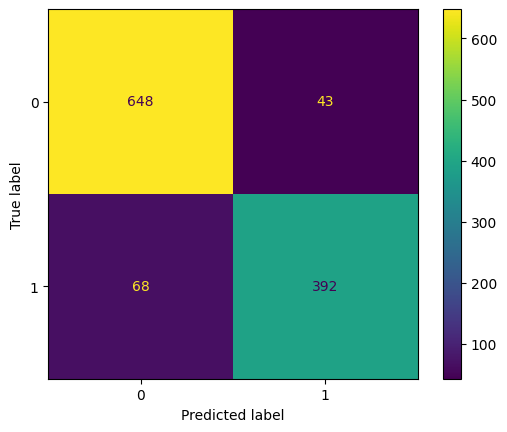

In [13]:
def generate_confusion_matrix(random_state=42):
    clf = LogisticRegression(max_iter=1000, random_state=random_state).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return confusion_matrix(y_test, y_pred)

log_reg_cm = generate_confusion_matrix()
print("Logistic Regression Confusion Matrix:\n", log_reg_cm)
ConfusionMatrixDisplay(log_reg_cm).plot()
plt.show()

## 8. Grid Search on Logistic Regression

Perform GridSearchCV over specified hyperparameters for a Logistic Regression classifier.

In [14]:
def perform_grid_search():
    params = {'penalty': ['l1', 'l2'], 'C': [0.005, 0.01, 0.05, 0.1, 1.0, 10.0]}
    grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), params, scoring='precision', cv=5)
    grid_search.fit(X_train, y_train)
    
    return grid_search.cv_results_['mean_test_score'].reshape(6, 2)

grid_search_results = perform_grid_search()
print("Grid Search Results:\n", grid_search_results)

Grid Search Results:
 [[0.86896 0.91596]
 [0.90478 0.91791]
 [0.92881 0.92266]
 [0.93051 0.92125]
 [0.92606 0.92687]
 [0.92337 0.92308]]


## 9. Normalizing Features

Compare precision with and without feature normalization.

In [15]:
def compare_normalization():
    # With normalization
    params = {'penalty': ['l1', 'l2'], 'C': [0.005, 0.01, 0.05, 0.1, 1.0, 10.0]}
    grid_search_normalized = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), params, scoring='precision', cv=5)
    grid_search_normalized.fit(X_train, y_train)
    best_precision_normalized = max(grid_search_normalized.cv_results_['mean_test_score'])
    
    # Without normalization
    grid_search_unnormalized = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), params, scoring='precision', cv=5)
    grid_search_unnormalized.fit(X_train_raw, y_train)
    best_precision_unnormalized = max(grid_search_unnormalized.cv_results_['mean_test_score'])
    
    return best_precision_normalized, best_precision_unnormalized

normalization_results = compare_normalization()
print(f"Best Precision with Normalization: {normalization_results[0]:.5f}")
print(f"Best Precision without Normalization: {normalization_results[1]:.5f}")

Best Precision with Normalization: 0.93051
Best Precision without Normalization: 0.92426
